# Reuters 뉴스 기사 카테고리 분류하기

In [2]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# MNIST 데이터 불러옵니다.
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인합니다.
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])



46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 데이터 전처리 합니다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
# 모델을 설정 합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [7]:
# 모델을 컴파일 합니다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [8]:
# 모델을 실행합니다.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

Epoch 1/20
90/90 [==============================] - 23s 228ms/step - loss: 2.5836 - accuracy: 0.3450 - val_loss: 2.3265 - val_accuracy: 0.4524
Epoch 2/20
90/90 [==============================] - 20s 222ms/step - loss: 2.0901 - accuracy: 0.4744 - val_loss: 2.0091 - val_accuracy: 0.4987
Epoch 3/20
90/90 [==============================] - 21s 235ms/step - loss: 1.9361 - accuracy: 0.5036 - val_loss: 1.9042 - val_accuracy: 0.5240
Epoch 4/20
90/90 [==============================] - 21s 234ms/step - loss: 1.7931 - accuracy: 0.5275 - val_loss: 1.7732 - val_accuracy: 0.5481
Epoch 5/20
90/90 [==============================] - 21s 234ms/step - loss: 1.6743 - accuracy: 0.5642 - val_loss: 1.6850 - val_accuracy: 0.5686
Epoch 6/20
90/90 [==============================] - 23s 251ms/step - loss: 1.6221 - accuracy: 0.5814 - val_loss: 1.6959 - val_accuracy: 0.5717
Epoch 7/20
90/90 [==============================] - 20s 224ms/step - loss: 1.5725 - accuracy: 0.5986 - val_loss: 1.6060 - val_accuracy: 0.6095

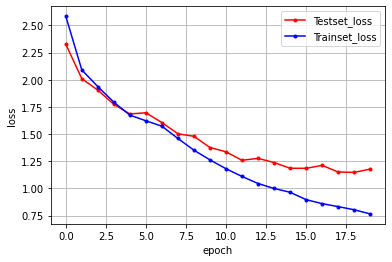

In [11]:
# 그래프로 표현합니다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시합니다.
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

import matplotlib.pyplot as plt
import numpy
import tensorflow as tf


# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

(X_train, Y_train), (X_test, Y_test)  = reuters.load_data(num_words=1000, test_split=0.2)

category = numpy.max(Y_train) + 1
# print("category : ", category)
# print(len(X_train), "학습용 뉴스 기사")
# print(len(X_test), "테스트용 뉴스 기사")
# print(X_train[0])
# print(len(X_train[0]))
# print(Y_train[0])

# 데이터 전처리 합니다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델을 설정 합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델을 컴파일 합니다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))


Epoch 1/20
90/90 [==============================] - 22s 224ms/step - loss: 2.5634 - accuracy: 0.3657 - val_loss: 2.1714 - val_accuracy: 0.4871
Epoch 2/20
90/90 [==============================] - 20s 221ms/step - loss: 2.0454 - accuracy: 0.4928 - val_loss: 1.9884 - val_accuracy: 0.5125
Epoch 3/20
90/90 [==============================] - 20s 219ms/step - loss: 1.8767 - accuracy: 0.5263 - val_loss: 1.7539 - val_accuracy: 0.5614
Epoch 4/20
90/90 [==============================] - 20s 223ms/step - loss: 1.6930 - accuracy: 0.5684 - val_loss: 1.8266 - val_accuracy: 0.5280
Epoch 5/20
90/90 [==============================] - 20s 224ms/step - loss: 1.6557 - accuracy: 0.5718 - val_loss: 1.7064 - val_accuracy: 0.5663
Epoch 6/20
90/90 [==============================] - 20s 220ms/step - loss: 1.5829 - accuracy: 0.5980 - val_loss: 1.6114 - val_accuracy: 0.5859
Epoch 7/20
90/90 [==============================] - 20s 219ms/step - loss: 1.5184 - accuracy: 0.6172 - val_loss: 1.5642 - val_accuracy: 0.6037